In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('ticks')
sns.set_palette('husl')

SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [6]:
titanic_data = pd.read_csv(r"C:\Users\Komal\dataset\tested.csv")

In [7]:
titanic_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:

n_titanic_data=titanic_data.drop(['Cabin','Ticket','Name',
                                  'Fare','PassengerId'],axis=1)

In [10]:
n_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S


In [11]:
n_titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [12]:



descript = n_titanic_data.copy()

descript.loc[:,'Embarked'].replace(['C','S','Q'],
                                      ['Cherbourg','Southampton','Queenstown'],
                                      inplace=True)

descript.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

In [13]:
def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "coolwarm"):
    '''
    Group by col1, sort by size , return and plot the dataframe with a bar and pie plot
    '''
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    
    print ('Total No. of {}:{}'.format(col,gr['{} No'.format(col)].sum()))
    
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    
    fig=plt.figure()
    plt.axis('off')

    fig.add_subplot(121)
    
    ax=gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2),
                                     (p.get_x()+p.get_width()/2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

Total No. of Embarked:418


C:\Users\Komal\AppData\Local\Temp\ipykernel_20912\267044147.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


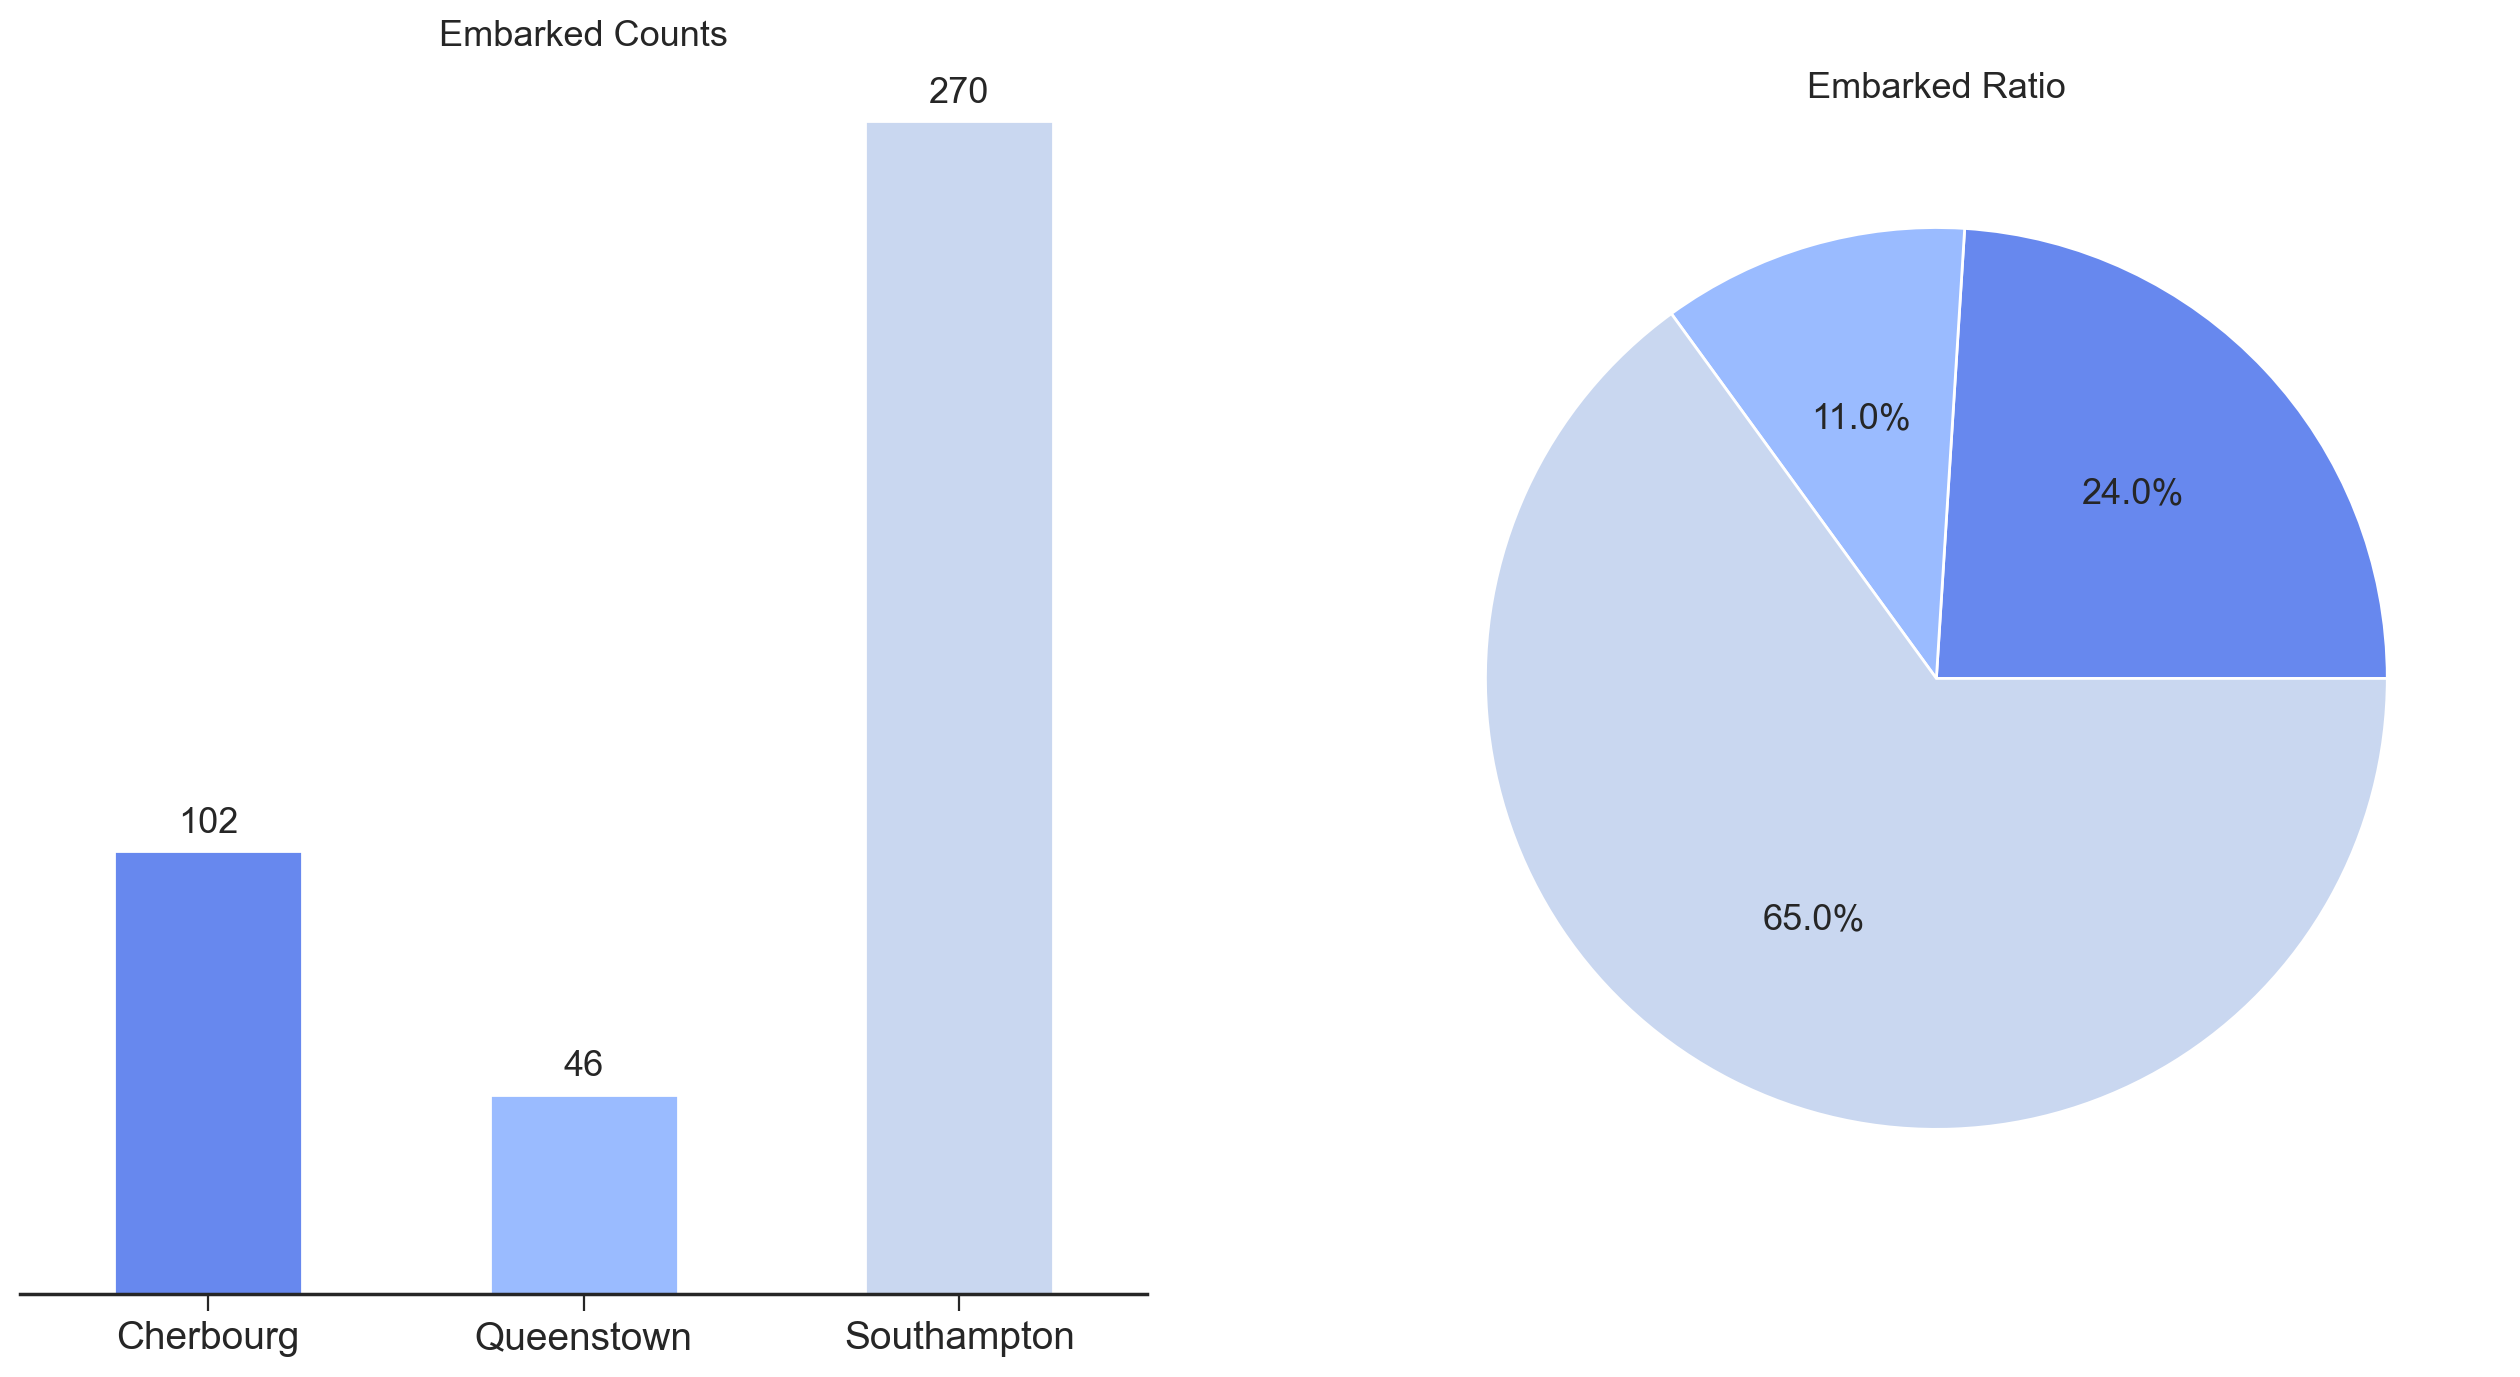

In [14]:
Groupby_OneCol_comp_plot(descript, 'Embarked')

In [15]:
def plot(table, legloc='upper right',
                                    plt_style = 'seaborn-ticks',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(19,10), width=0.7 ):     
    grouped = table
    
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:   
        del grouped['Total']
    except:
        pass
    
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)  
    plt.legend(loc=legloc) 
    
    if percentage == True:
      for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    else:
      for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False);
    else:
        pass     
    plt.title(custom_title)
    
def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right',
                                    plt_style = 'ggplot',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(14,6), width=0.6):   
    
    grouped = df.groupby([col2,col1]).size().unstack(col2)
    
    grouped['Total'] = grouped.sum(axis=1)
   
    plot(grouped, legloc=legloc,
                                    plt_style = plt_style,
                                    color_palette=color_palette,sorter=sorter, stacked=stacked,
                                    kind = kind , percentage = percentage,
                               custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)

C:\Users\Komal\AppData\Local\Temp\ipykernel_20912\1913458405.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


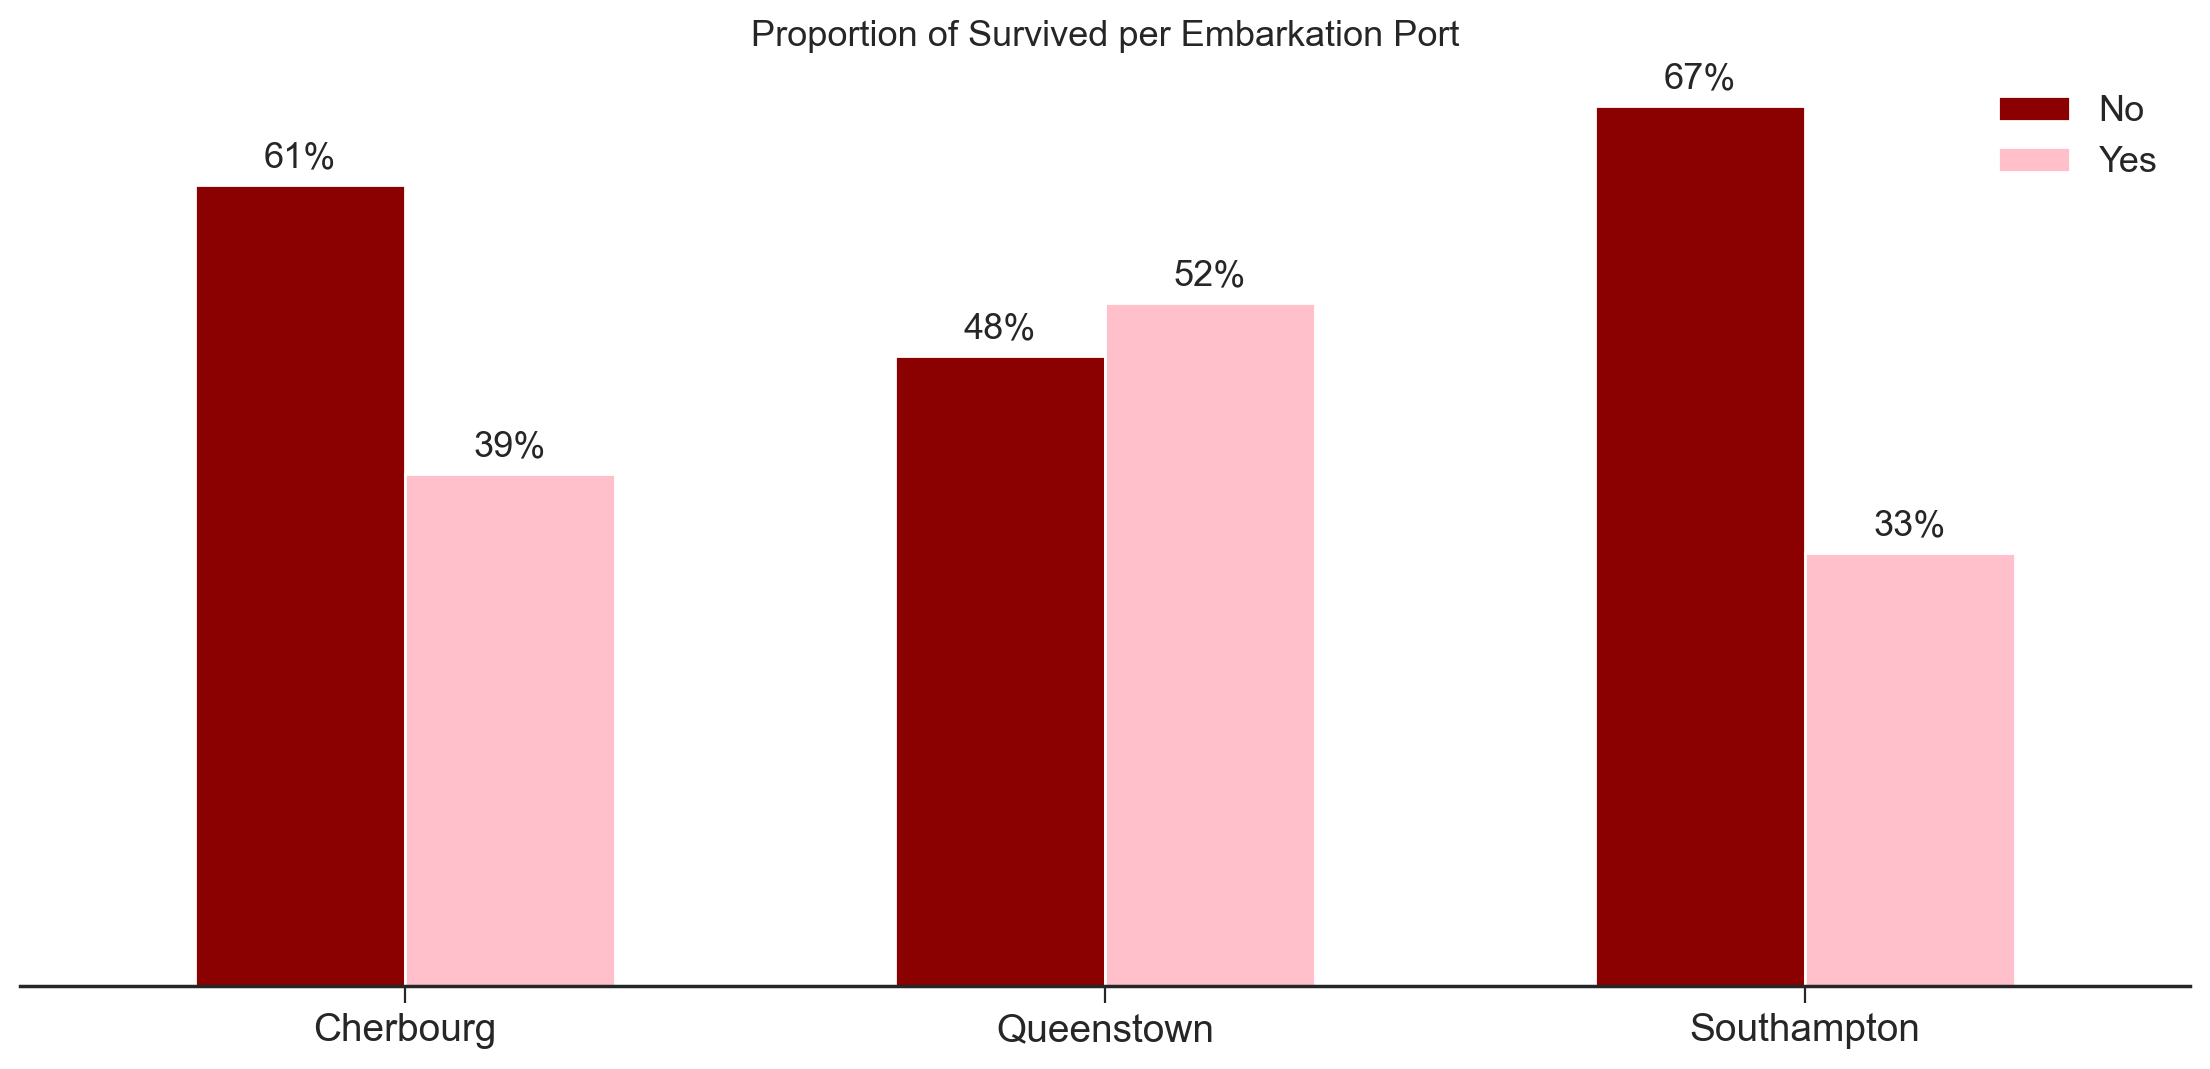

In [16]:
Groupby_TwoCol_Plot(descript,'Embarked', 'Survived', color_palette=('darkred','pink'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per Embarkation Port')

C:\Users\Komal\AppData\Local\Temp\ipykernel_20912\1913458405.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


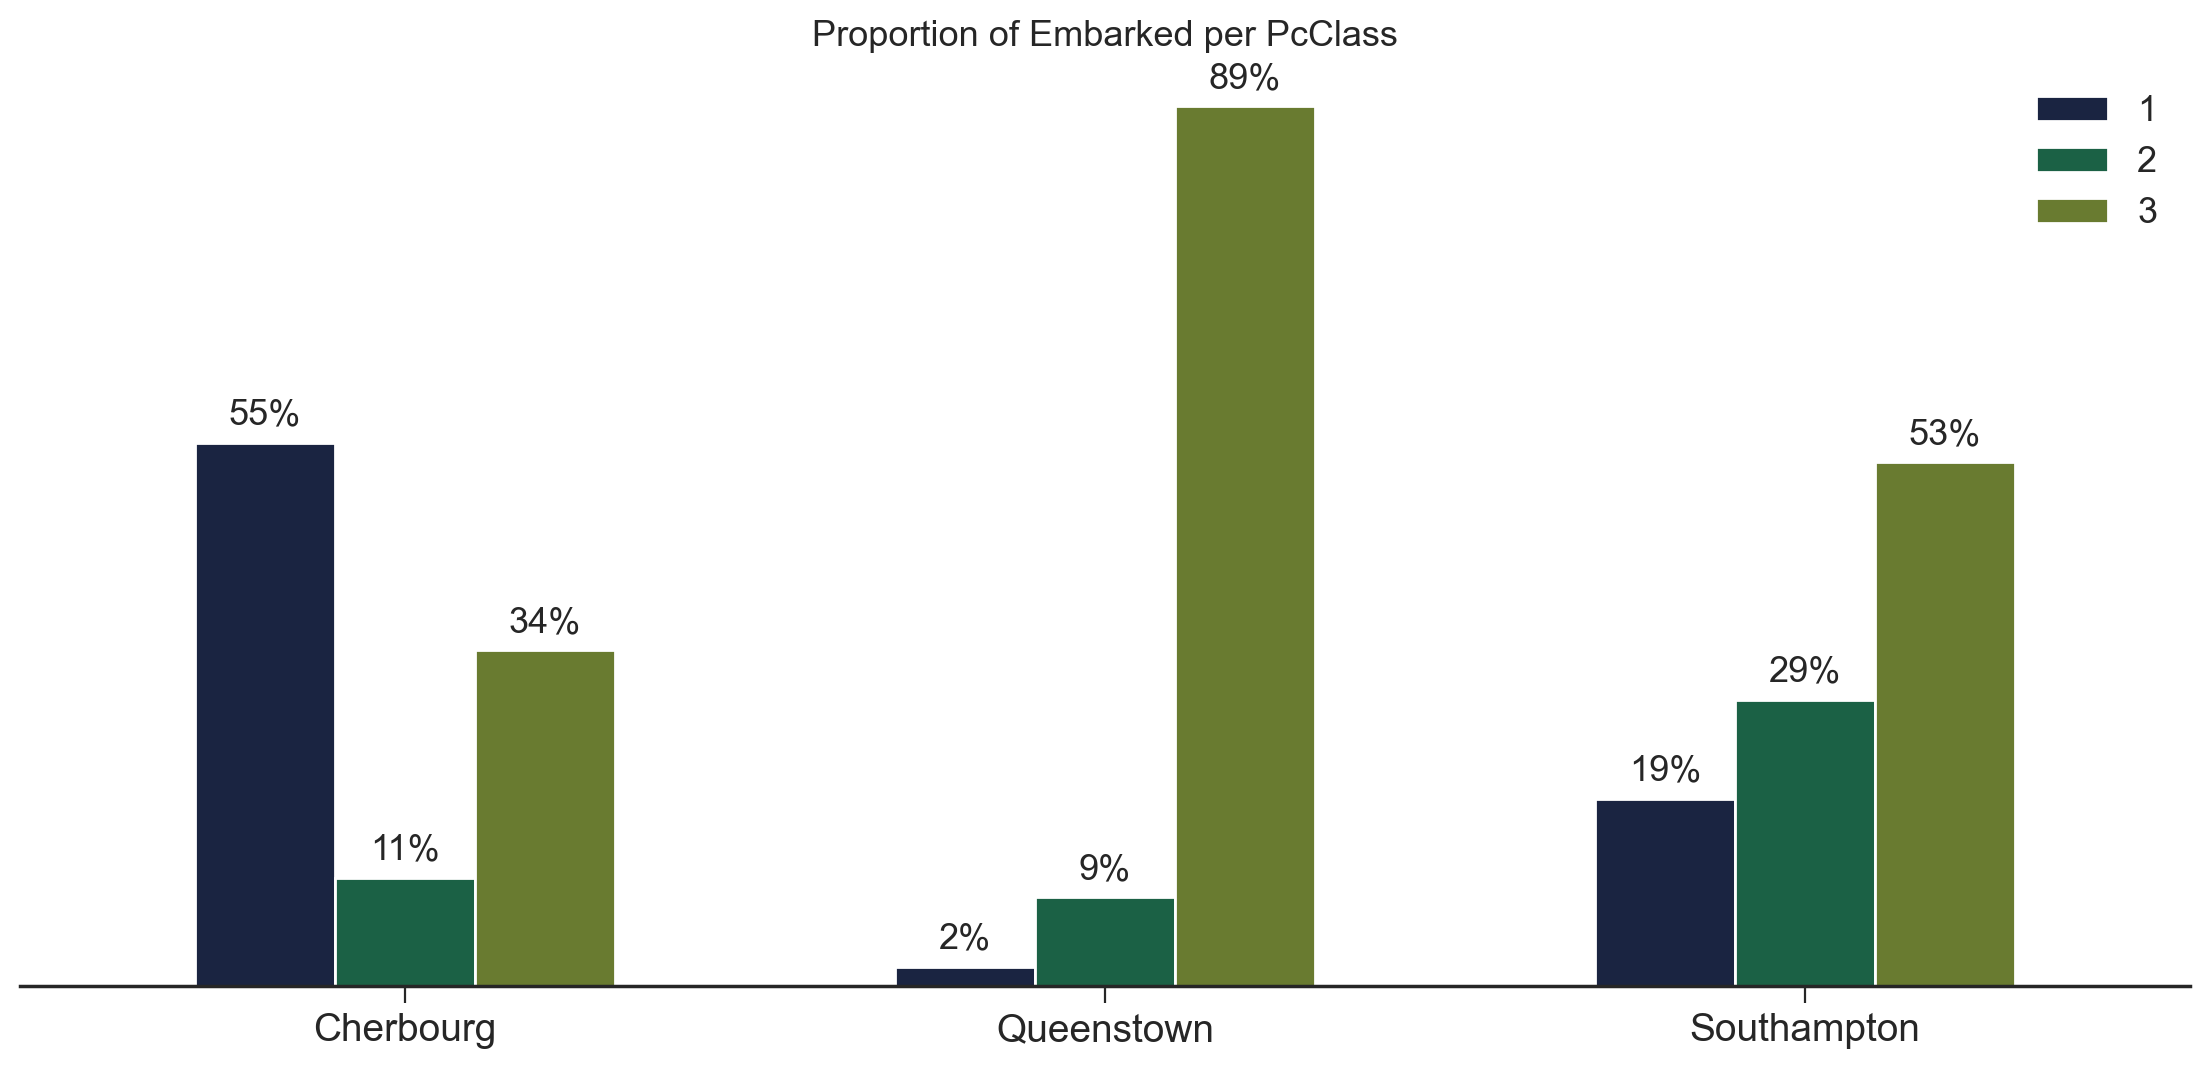

In [17]:
Groupby_TwoCol_Plot(descript,'Embarked', 'Pclass', color_palette=('cubehelix'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Embarked per PcClass', sorter = [1,2,3])

C:\Users\Komal\AppData\Local\Temp\ipykernel_20912\1913458405.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


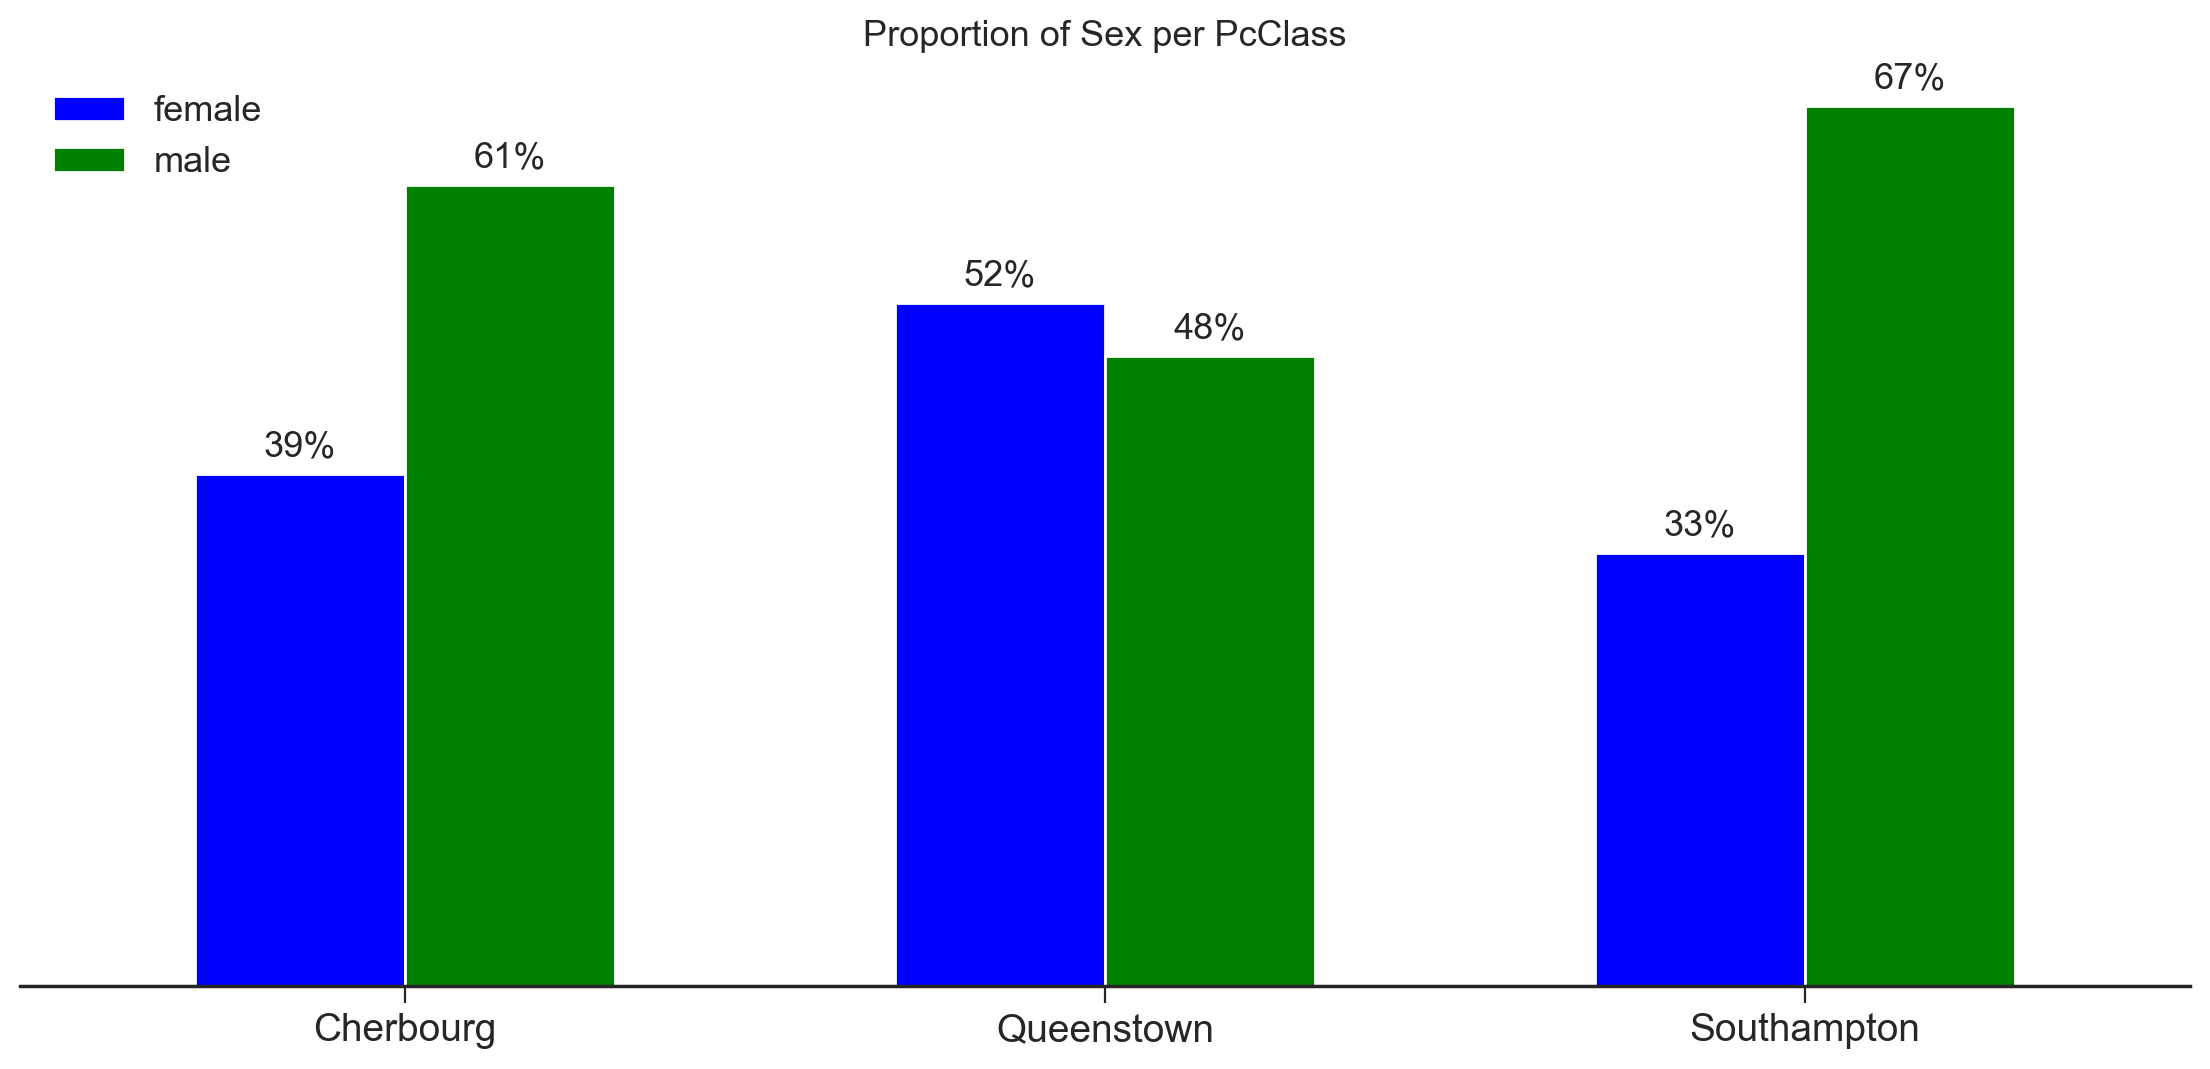

In [18]:
Groupby_TwoCol_Plot(descript,'Embarked', 'Sex', color_palette=('blue','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

Total No. of Sex:418


C:\Users\Komal\AppData\Local\Temp\ipykernel_20912\267044147.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


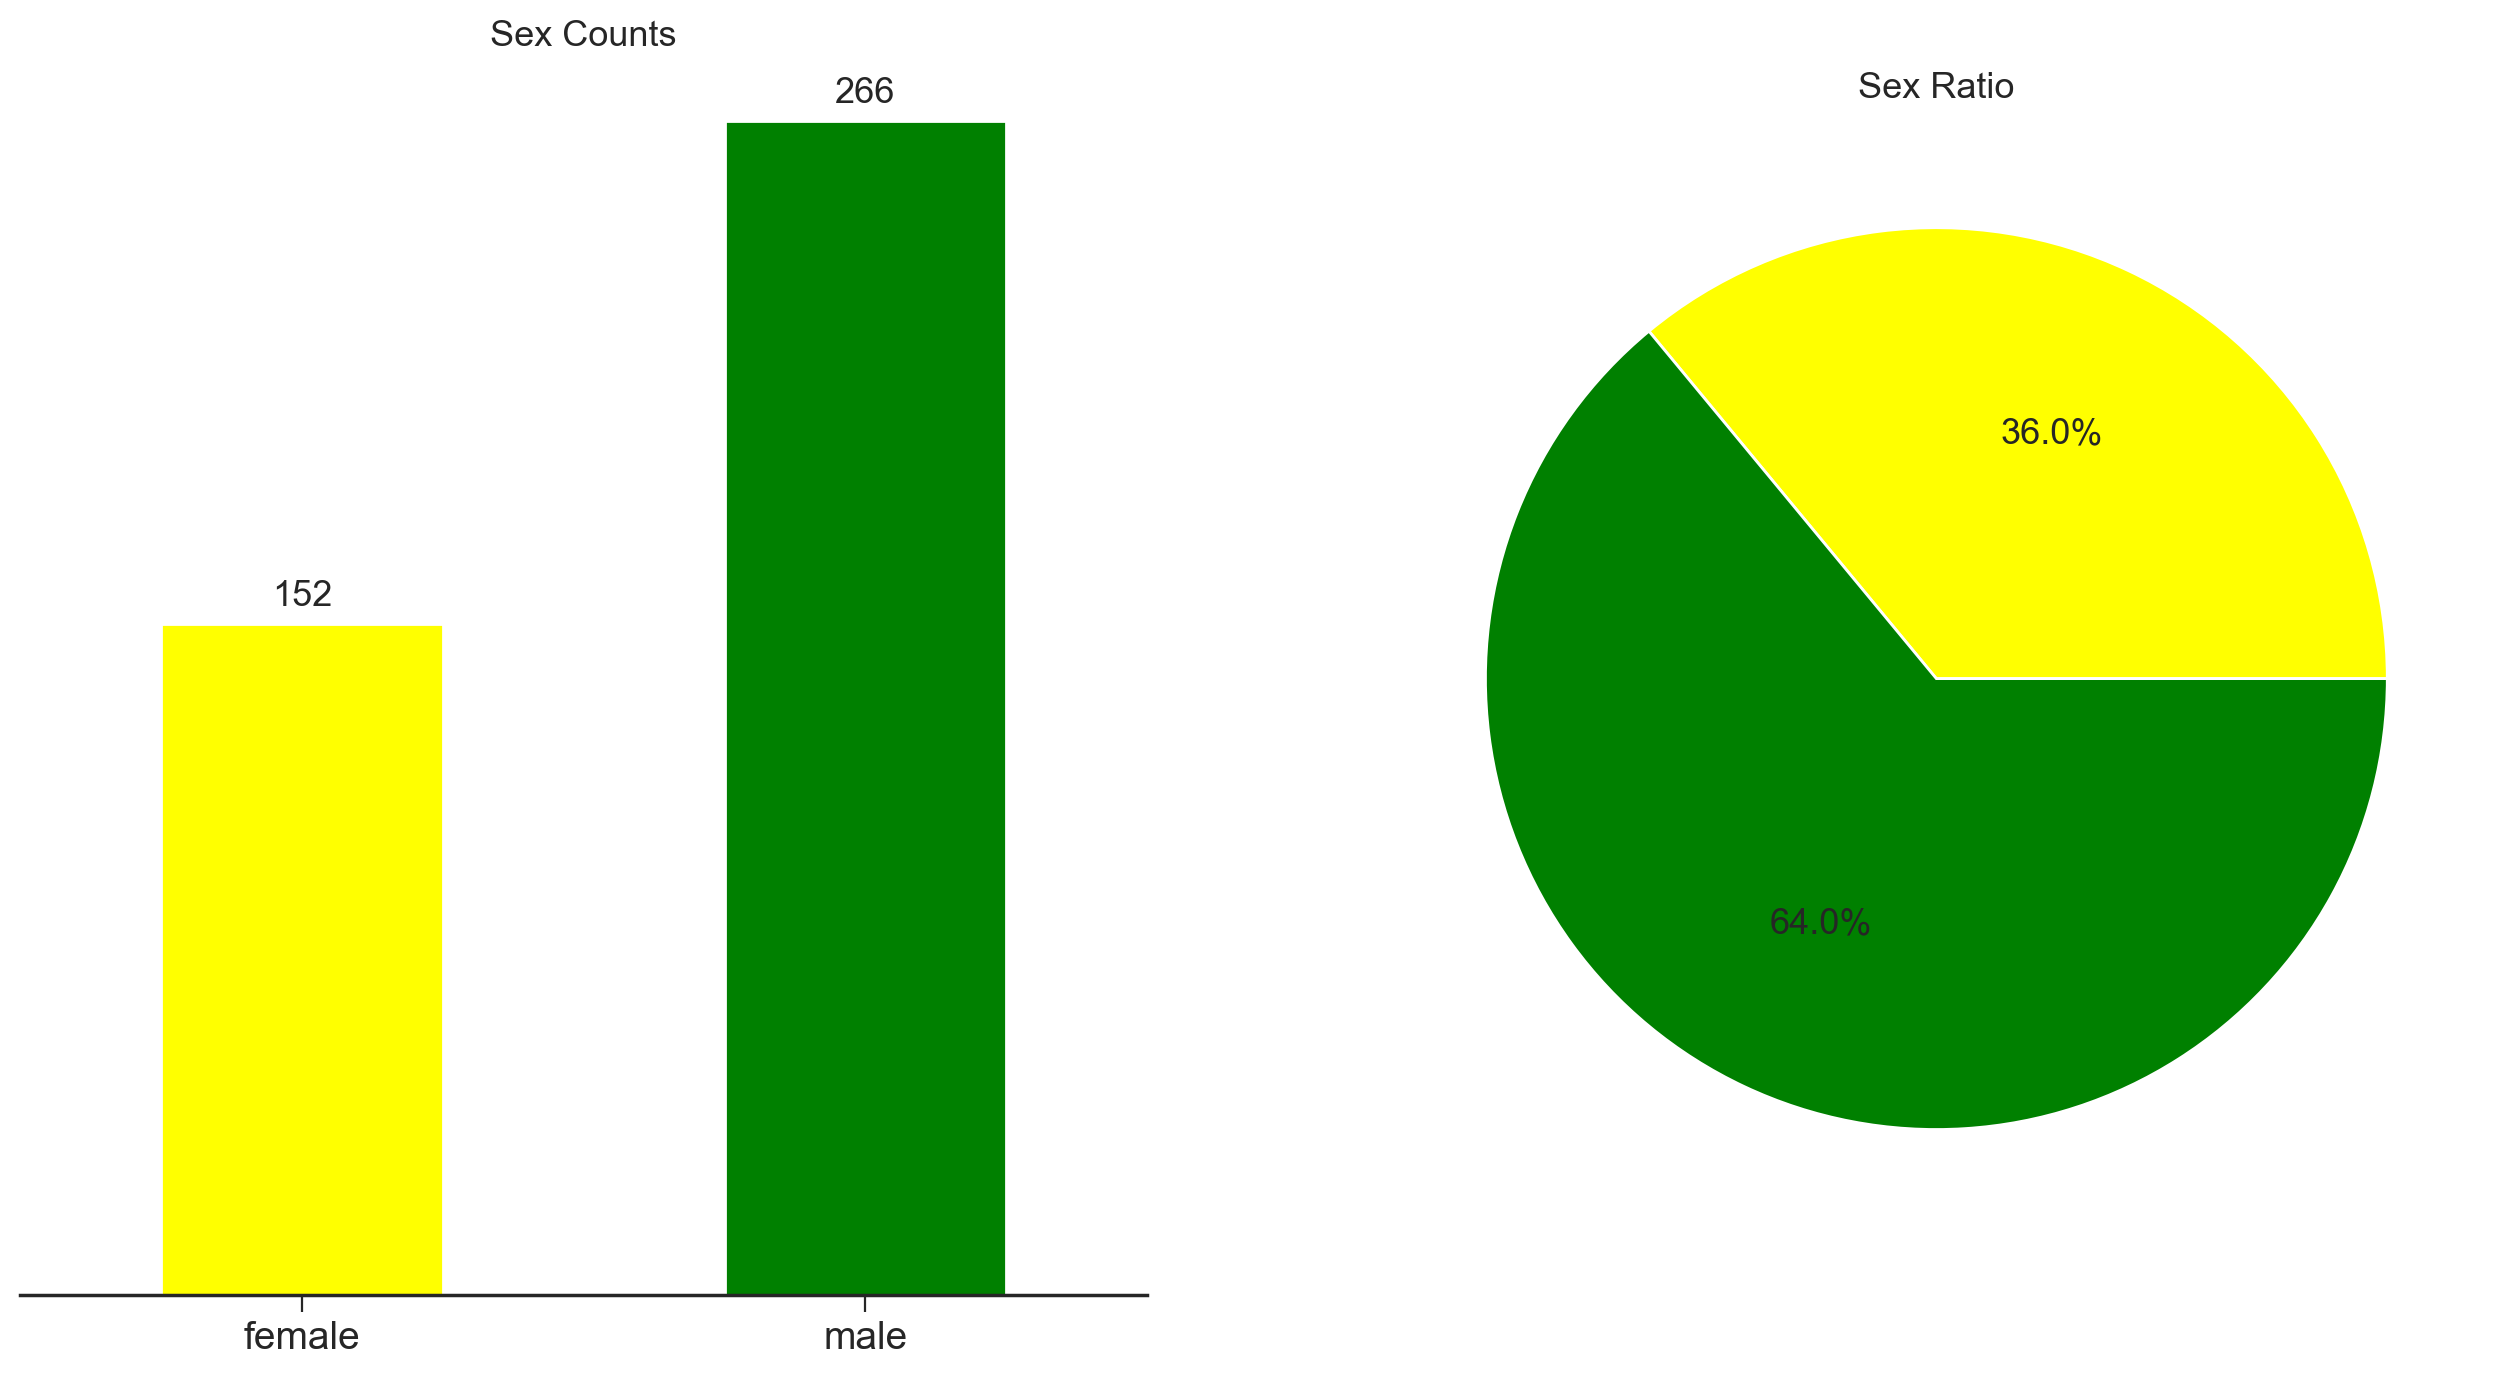

In [19]:
Groupby_OneCol_comp_plot(descript, 'Sex', color_palette = ('yellow','green') )

C:\Users\Komal\AppData\Local\Temp\ipykernel_20912\1913458405.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


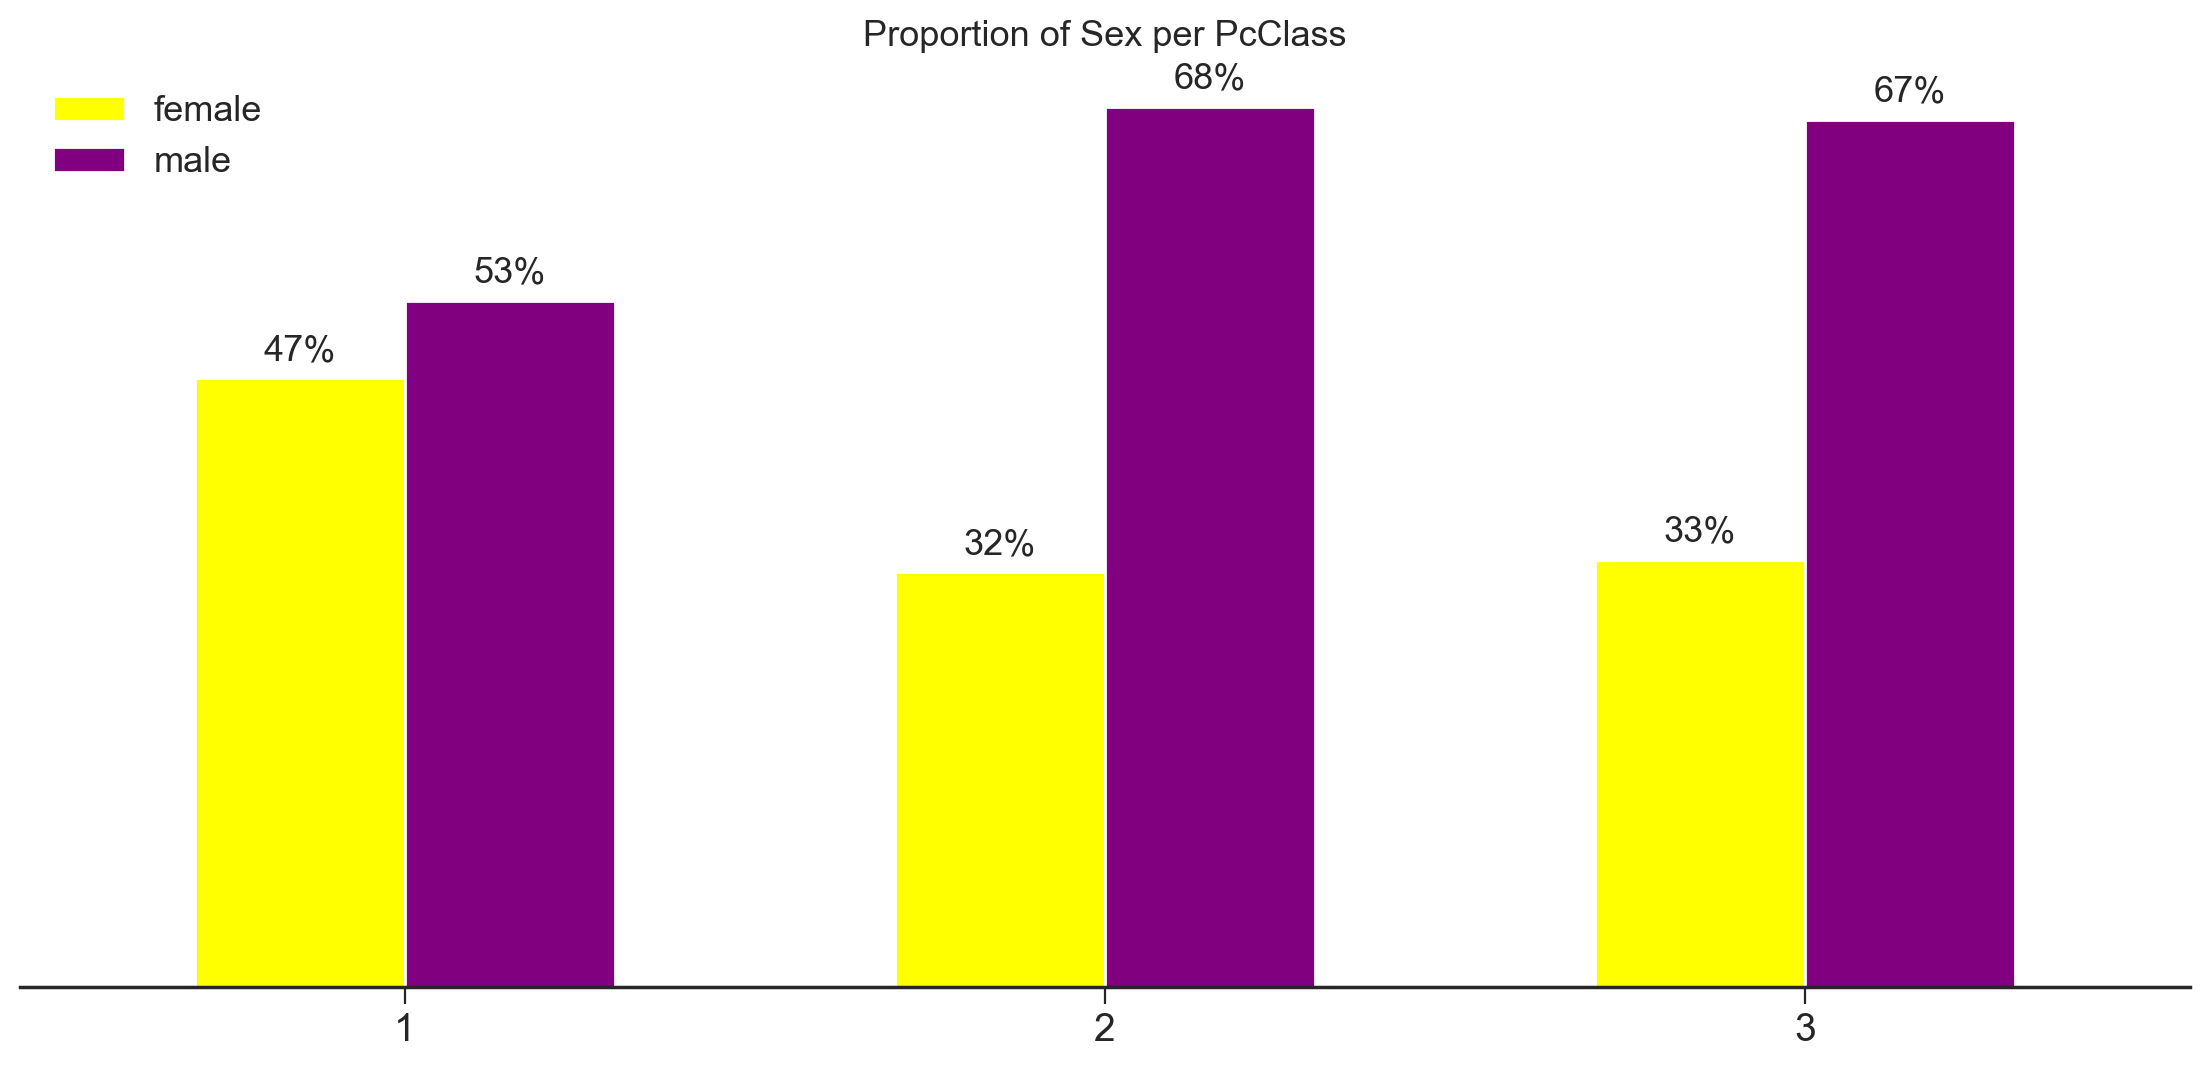

In [20]:
Groupby_TwoCol_Plot(descript,'Pclass', 'Sex', color_palette=('yellow','purple'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

C:\Users\Komal\AppData\Local\Temp\ipykernel_20912\1913458405.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


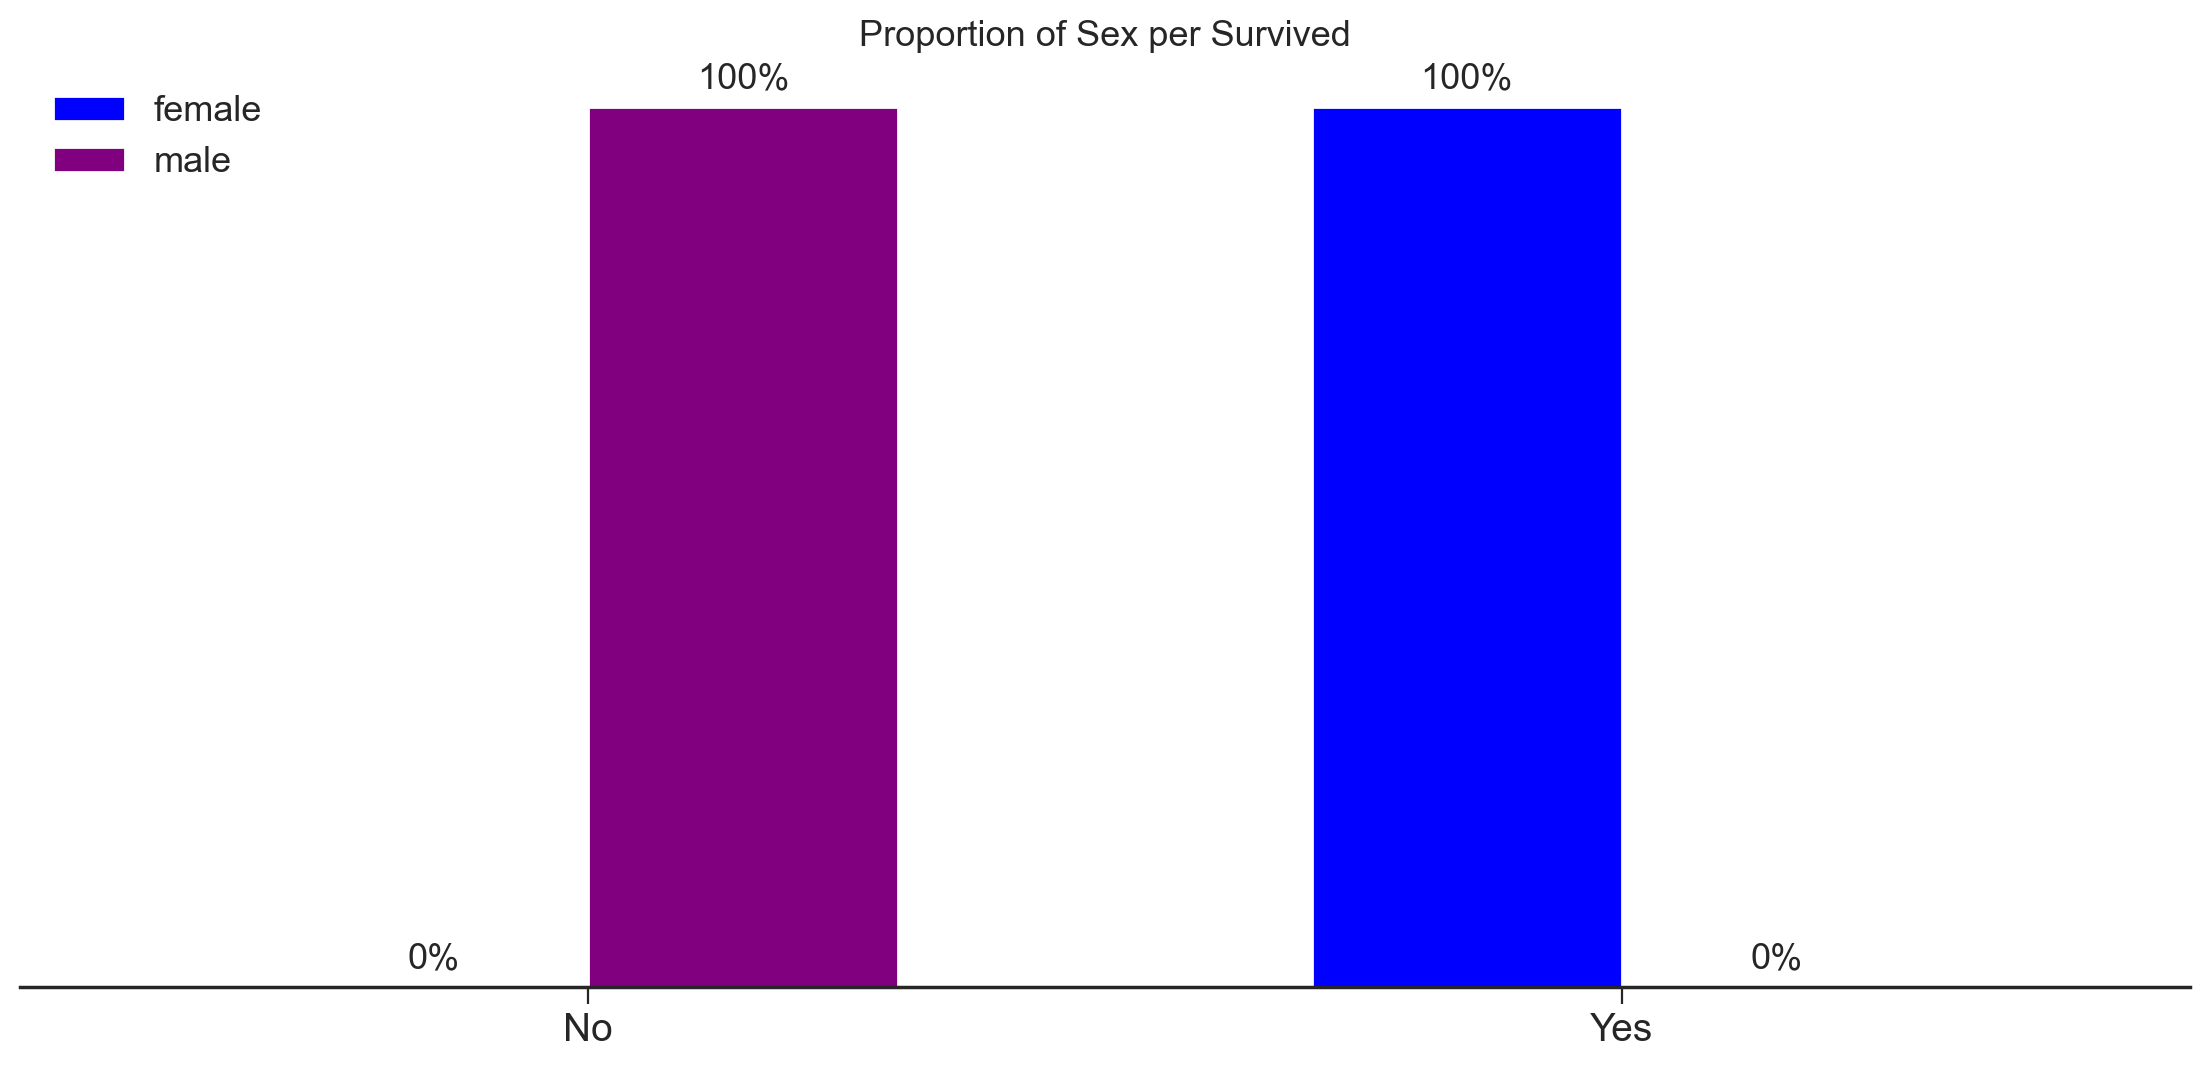

In [21]:
Groupby_TwoCol_Plot(descript,'Survived', 'Sex', color_palette=('blue','purple'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per Survived',
                   legloc='upper left')

In [22]:
not_missing = n_titanic_data[(n_titanic_data['Age'].notnull())] 

not_missing.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

C:\Users\Komal\AppData\Local\Temp\ipykernel_20912\869112402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_missing.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)


In [23]:
print ('No. of Passengers with not missing Age Values:{}'.format(len(not_missing)))

No. of Passengers with not missing Age Values:332


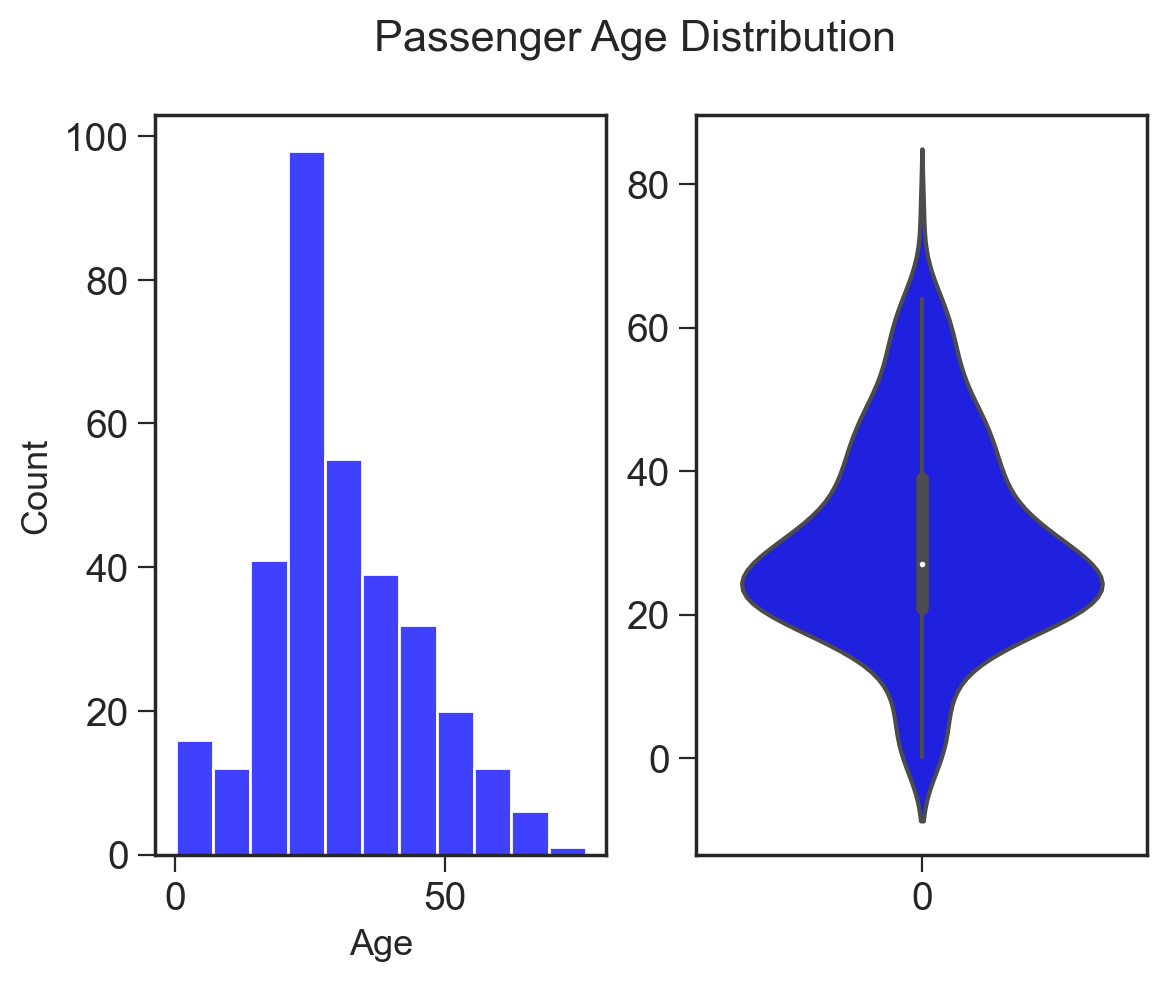

In [28]:
ax=plt.figure()
plt.suptitle('Passenger Age Distribution')
ax.add_subplot(121)
sns.histplot(not_missing['Age'],bins=11)
ax.add_subplot(122)
sns.violinplot(not_missing['Age'],);

In [29]:
v= pd.DataFrame(not_missing['Age'].describe())

v.index = ['Population Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
v = v.round(decimals=3)
v

,Age
Population Size,332.000
Mean,30.273
Std. Deviation,14.181
Min,0.170
25% Qt,21.000
Median,27.000
75% Qt,39.000
Max,76.000


In [30]:
age = pd.DataFrame()
age['all'] = not_missing['Age']
not_survived = age['Not-survived'] = not_missing['Age'][not_missing['Survived']=='No']
survived = age['Survived'] = not_missing['Age'][not_missing['Survived']=='Yes']

var = age.describe()

var.index = ['Sample Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
var = var.round(decimals=3)

In [31]:
var.loc[:,['Not-survived','Survived']]

,Not-survived,Survived
Sample Size,205.000,127.000
Mean,30.273,30.272
Std. Deviation,13.390,15.429
Min,0.330,0.170
25% Qt,22.000,20.500
Median,27.000,27.000
75% Qt,40.000,38.500
Max,67.000,76.000


In [32]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
              '70-80']
age_group_values = pd.cut(not_missing.Age, range(0,81,10),
                                   right=False, labels=age_labels)
not_missing.loc[:,'age-groups'] = age_group_values

not_missing.loc[not_missing['Age']>=80, 'age-groups'] = '70-80'

obs_table = pd.crosstab([not_missing['Survived']],[not_missing['age-groups']])

C:\Users\Komal\AppData\Local\Temp\ipykernel_20912\634797361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_missing.loc[:,'age-groups'] = age_group_values


In [33]:
obs_table

age-groups,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80
Survived,,,,,,,,
No,11,22,81,39,32,13,7,0
Yes,9,19,43,26,14,9,6,1


In [34]:
chi2, p, dof, expected = chi2_contingency(obs_table)

print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))

chi2:5.490080626151368
dof:7
p:0.6003806037184933
